In [16]:
import cv2
import os
import mahotas
from matplotlib import pyplot as plt

### Read Image

In [2]:
image = cv2.imread("things.jpg")
image.shape

(4032, 3024, 3)

In [54]:
r = 300/ image.shape[1]
dim = (300, (int(image.shape[0] * r)))
resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

### Thresholding Techniques
- Simple Thresholding
- Adaptive Thresholding using Gaussian Thresholding
- OTSU Thresholding
- Riddler_Calvard Thresholding

### Simple Thresholding

In [5]:
simple_gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
simple_blurred = cv2.GaussianBlur(simple_gray, (5, 5), 0)

In [6]:
(T, thresh) = cv2.threshold(simple_blurred, 120, 255, cv2.THRESH_BINARY)

In [7]:
(T, threshinv) = cv2.threshold(simple_blurred, 120, 255, cv2.THRESH_BINARY_INV)

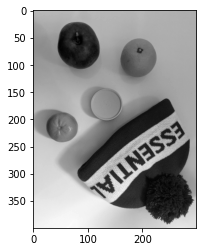

In [18]:
plt.imshow(simple_gray, cmap='gray')

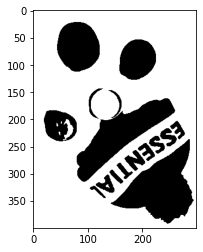

In [31]:
plt.imshow(thresh, cmap='gray')

### Adaptive Thresholding

In [35]:
ad_gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
ad_blurred = cv2.GaussianBlur(ad_gray, (3, 3), 0)

In [36]:
ad_thresh = cv2.adaptiveThreshold(ad_blurred, 
                               255, 
                               cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY_INV, 
                               7, 
                               5)

#### Gaussian Thresholding

In [37]:
ad_gaussianthresh = cv2.adaptiveThreshold(ad_blurred, 
                               255, 
                               cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY_INV, 
                               15,
                               7)

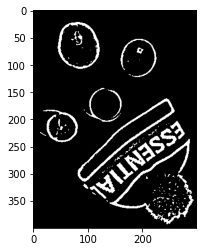

In [57]:
plt.imshow(ad_gaussianthresh, cmap='gray')

### OTSU Thresholding

In [42]:
otsu_gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
otsu_blurred = cv2.GaussianBlur(otsu_gray, (5, 5), 0)

In [43]:
T = mahotas.thresholding.otsu(otsu_blurred)

otsu_thresh = resized_image.copy()
otsu_thresh[otsu_thresh > T] = 255
otsu_thresh[otsu_thresh < 255] = 0

In [44]:
otsu_threshinv = cv2.bitwise_not(otsu_thresh)

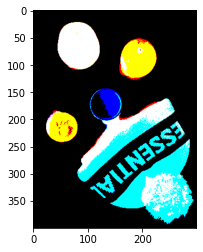

In [58]:
plt.imshow(otsu_threshinv, cmap='gray')

### Riddler-Calvard Thresholding

In [48]:
RC_gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
RC_blurred = cv2.GaussianBlur(RC_gray, (5, 5), 0)

In [49]:
T_RC = mahotas.thresholding.rc(RC_blurred)

thresh_RC = resized_image.copy()
thresh_RC[thresh_RC > T_RC] = 255
thresh_RC[thresh_RC < 255] = 0

In [50]:
thresh_RCinv = cv2.bitwise_not(thresh_RC)

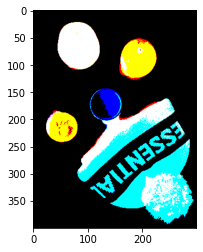

In [55]:
plt.imshow(thresh_RCinv, cmap='gray')